In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/total_count.csv')
df

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,급가속,급출발,급감속,급정지
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.158670,35.236021,0,-6.3,0.7,0,0,0,0
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.158670,35.236021,0,-7.9,1.6,0,0,0,0
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.158670,35.236021,0,-8.9,2.2,0,0,0,0
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.158670,35.236021,0,-6.6,0.8,0,0,0,0
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.158670,35.236021,0,-7.1,0.8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948207,20221231,부산70자1894,176,3095705,22123121033800,0,331,0,129.158597,35.235956,66,-5.7,-1.2,0,0,0,0
5948208,20221231,부산70자1894,176,3095705,22123121033900,0,59,0,129.158597,35.235956,66,-5.8,-1.4,0,0,0,0
5948209,20221231,부산70자1894,176,3095705,22123121034000,0,0,0,129.158597,35.235956,66,-5.4,-1.0,0,0,0,0
5948210,20221231,부산70자1894,176,3095705,22123121034100,0,0,0,129.158597,35.235956,66,-5.4,-0.9,0,0,0,0


In [3]:
bus1854 = df.query('번호판 == "부산70자1854"')
bus1893 = df.query('번호판 == "부산70자1893"')

In [8]:
l1 = []
l2 = []


for i in bus1854.index:
    if i == 0:
        l1.append(0)
        l2.append(0)
        continue

    l1.append(bus1854['차량속도'][i] - bus1854['차량속도'][i - 1])

    if bus1854['차량속도'][i] != 0:
        l2.append((bus1854['차량속도'][i] - bus1854['차량속도'][i - 1]) / bus1854['차량속도'][i])
    else:
        l2.append(0)

In [9]:
bus1854['가속도'] = l1
bus1854['속도에대한가속도변화량'] = l2

C:\Users\admin\AppData\Local\Temp\ipykernel_13828\628950648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus1854['가속도'] = l1
C:\Users\admin\AppData\Local\Temp\ipykernel_13828\628950648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus1854['속도에대한가속도변화량'] = l2


In [73]:
b = bus1854.query('급가속 == 1')
b

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,급가속,급출발,급감속,급정지,가속도,속도에대한가속도변화량
2638,20221201,부산70자1854,11,66455,22120105511300,12,1163,0,129.139777,35.168029,135,-5.7,-0.8,1,0,0,0,7,0.583333
2757,20221201,부산70자1854,12,66456,22120105531200,31,1724,0,129.145317,35.162695,120,-6.7,-1.1,1,0,0,0,6,0.193548
3622,20221201,부산70자1854,17,66460,22120106073700,35,1936,0,129.179144,35.175996,145,-6.8,-1.5,1,0,0,0,7,0.200000
3827,20221201,부산70자1854,18,66462,22120106110200,21,2029,0,129.181120,35.165708,211,-5.3,-1.6,1,0,0,0,6,0.285714
4055,20221201,부산70자1854,19,66463,22120106145000,13,1254,0,129.178044,35.169898,330,-5.4,-0.6,1,0,0,0,7,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429127,20221231,부산70자1854,21,72339,22123110163400,8,814,1,129.162917,35.165015,331,-5.4,-1.0,1,1,0,0,8,1.000000
1429582,20221231,부산70자1854,23,72340,22123110240900,31,1744,0,129.171446,35.161672,333,-6.3,0.9,1,0,0,0,6,0.193548
1431233,20221231,부산70자1854,27,72345,22123110514000,11,1146,0,129.167481,35.174107,194,-5.7,-0.7,1,0,0,0,7,0.636364
1431948,20221231,부산70자1854,31,72348,22123111033500,35,1966,0,129.147278,35.161827,300,-6.6,-0.9,1,0,0,0,6,0.171429


In [12]:
bus1893

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,급가속,급출발,급감속,급정지
2873328,20221201,부산70자1893,0,2022752,22120104254100,0,185,0,0.000000,0.000000,0,9.4,0.1,0,0,0,0
2873329,20221201,부산70자1893,0,2022752,22120104254200,0,246,0,0.000000,0.000000,0,-6.2,0.1,0,0,0,0
2873330,20221201,부산70자1893,0,2022752,22120104254300,0,827,0,0.000000,0.000000,0,-6.2,0.1,0,0,0,0
2873331,20221201,부산70자1893,0,2022752,22120104254400,0,592,0,0.000000,0.000000,0,10.4,0.1,0,0,0,0
2873332,20221201,부산70자1893,0,2022752,22120104254500,0,556,0,0.000000,0.000000,0,10.4,0.1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359148,20221231,부산70자1893,221,2022973,22123123434100,0,0,1,129.158911,35.236089,352,11.0,0.1,0,0,0,0
4359149,20221231,부산70자1893,221,2022973,22123123434200,0,0,0,129.158911,35.236089,352,11.0,0.1,0,0,0,0
4359150,20221231,부산70자1893,221,2022973,22123123434300,0,0,0,129.158911,35.236089,352,-11.6,0.1,0,0,0,0
4359151,20221231,부산70자1893,221,2022973,22123123434400,0,0,0,129.158911,35.236089,352,-11.6,0.1,0,0,0,0


In [15]:
l1 = []
l2 = []


for i in bus1893.index:
    if i == 2873328:
        l1.append(0)
        l2.append(0)
        continue

    l1.append(bus1893['차량속도'][i] - bus1893['차량속도'][i - 1])

    if bus1893['차량속도'][i] != 0:
        l2.append((bus1893['차량속도'][i] - bus1893['차량속도'][i - 1]) / bus1893['차량속도'][i])
    else:
        l2.append(0)

In [17]:
bus1893['가속도'] = l1
bus1893['속도에대한가속도변화량'] = l2
bus1893

C:\Users\admin\AppData\Local\Temp\ipykernel_13828\924059914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus1893['가속도'] = l1
C:\Users\admin\AppData\Local\Temp\ipykernel_13828\924059914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus1893['속도에대한가속도변화량'] = l2


,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,급가속,급출발,급감속,급정지,가속도,속도에대한가속도변화량
2873328,20221201,부산70자1893,0,2022752,22120104254100,0,185,0,0.000000,0.000000,0,9.4,0.1,0,0,0,0,0,0.0
2873329,20221201,부산70자1893,0,2022752,22120104254200,0,246,0,0.000000,0.000000,0,-6.2,0.1,0,0,0,0,0,0.0
2873330,20221201,부산70자1893,0,2022752,22120104254300,0,827,0,0.000000,0.000000,0,-6.2,0.1,0,0,0,0,0,0.0
2873331,20221201,부산70자1893,0,2022752,22120104254400,0,592,0,0.000000,0.000000,0,10.4,0.1,0,0,0,0,0,0.0
2873332,20221201,부산70자1893,0,2022752,22120104254500,0,556,0,0.000000,0.000000,0,10.4,0.1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359148,20221231,부산70자1893,221,2022973,22123123434100,0,0,1,129.158911,35.236089,352,11.0,0.1,0,0,0,0,0,0.0
4359149,20221231,부산70자1893,221,2022973,22123123434200,0,0,0,129.158911,35.236089,352,11.0,0.1,0,0,0,0,0,0.0
4359150,20221231,부산70자1893,221,2022973,22123123434300,0,0,0,129.158911,35.236089,352,-11.6,0.1,0,0,0,0,0,0.0
4359151,20221231,부산70자1893,221,2022973,22123123434400,0,0,0,129.158911,35.236089,352,-11.6,0.1,0,0,0,0,0,0.0


In [18]:
import matplotlib.pyplot as plt

In [86]:
bus1854_1 = bus1854[4000:4200]

In [87]:
bus1854_1['급가속'] = bus1854_1['급가속'].apply(lambda x: x * 30)
bus1854_1

C:\Users\admin\AppData\Local\Temp\ipykernel_13828\3524052222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus1854_1['급가속'] = bus1854_1['급가속'].apply(lambda x: x * 30)


,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,급가속,급출발,급감속,급정지,가속도,속도에대한가속도변화량
4000,20221201,부산70자1854,19,66462,22120106135500,0,547,1,129.178568,35.169034,325,-6.7,0.6,0,0,0,0,0,0.000000
4001,20221201,부산70자1854,19,66462,22120106135600,0,547,1,129.178568,35.169034,325,-6.7,0.5,0,0,0,0,0,0.000000
4002,20221201,부산70자1854,19,66462,22120106135700,0,549,1,129.178568,35.169034,325,-6.7,0.5,0,0,0,0,0,0.000000
4003,20221201,부산70자1854,19,66462,22120106135800,0,551,1,129.178568,35.169034,325,-6.7,0.5,0,0,0,0,0,0.000000
4004,20221201,부산70자1854,19,66462,22120106135900,0,551,1,129.178568,35.169034,325,-6.7,0.5,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,20221201,부산70자1854,20,66464,22120106171000,5,872,1,129.170454,35.163097,146,-5.1,-0.8,0,0,0,0,5,1.000000
4196,20221201,부산70자1854,20,66464,22120106171100,10,1051,0,129.170454,35.163097,146,-5.6,-0.7,0,0,0,0,5,0.500000
4197,20221201,부산70자1854,20,66464,22120106171200,13,1287,0,129.170478,35.163064,146,-5.7,-0.8,0,0,0,0,3,0.230769
4198,20221201,부산70자1854,20,66464,22120106171300,17,1601,0,129.170509,35.163036,143,-5.8,-0.6,0,0,0,0,4,0.235294


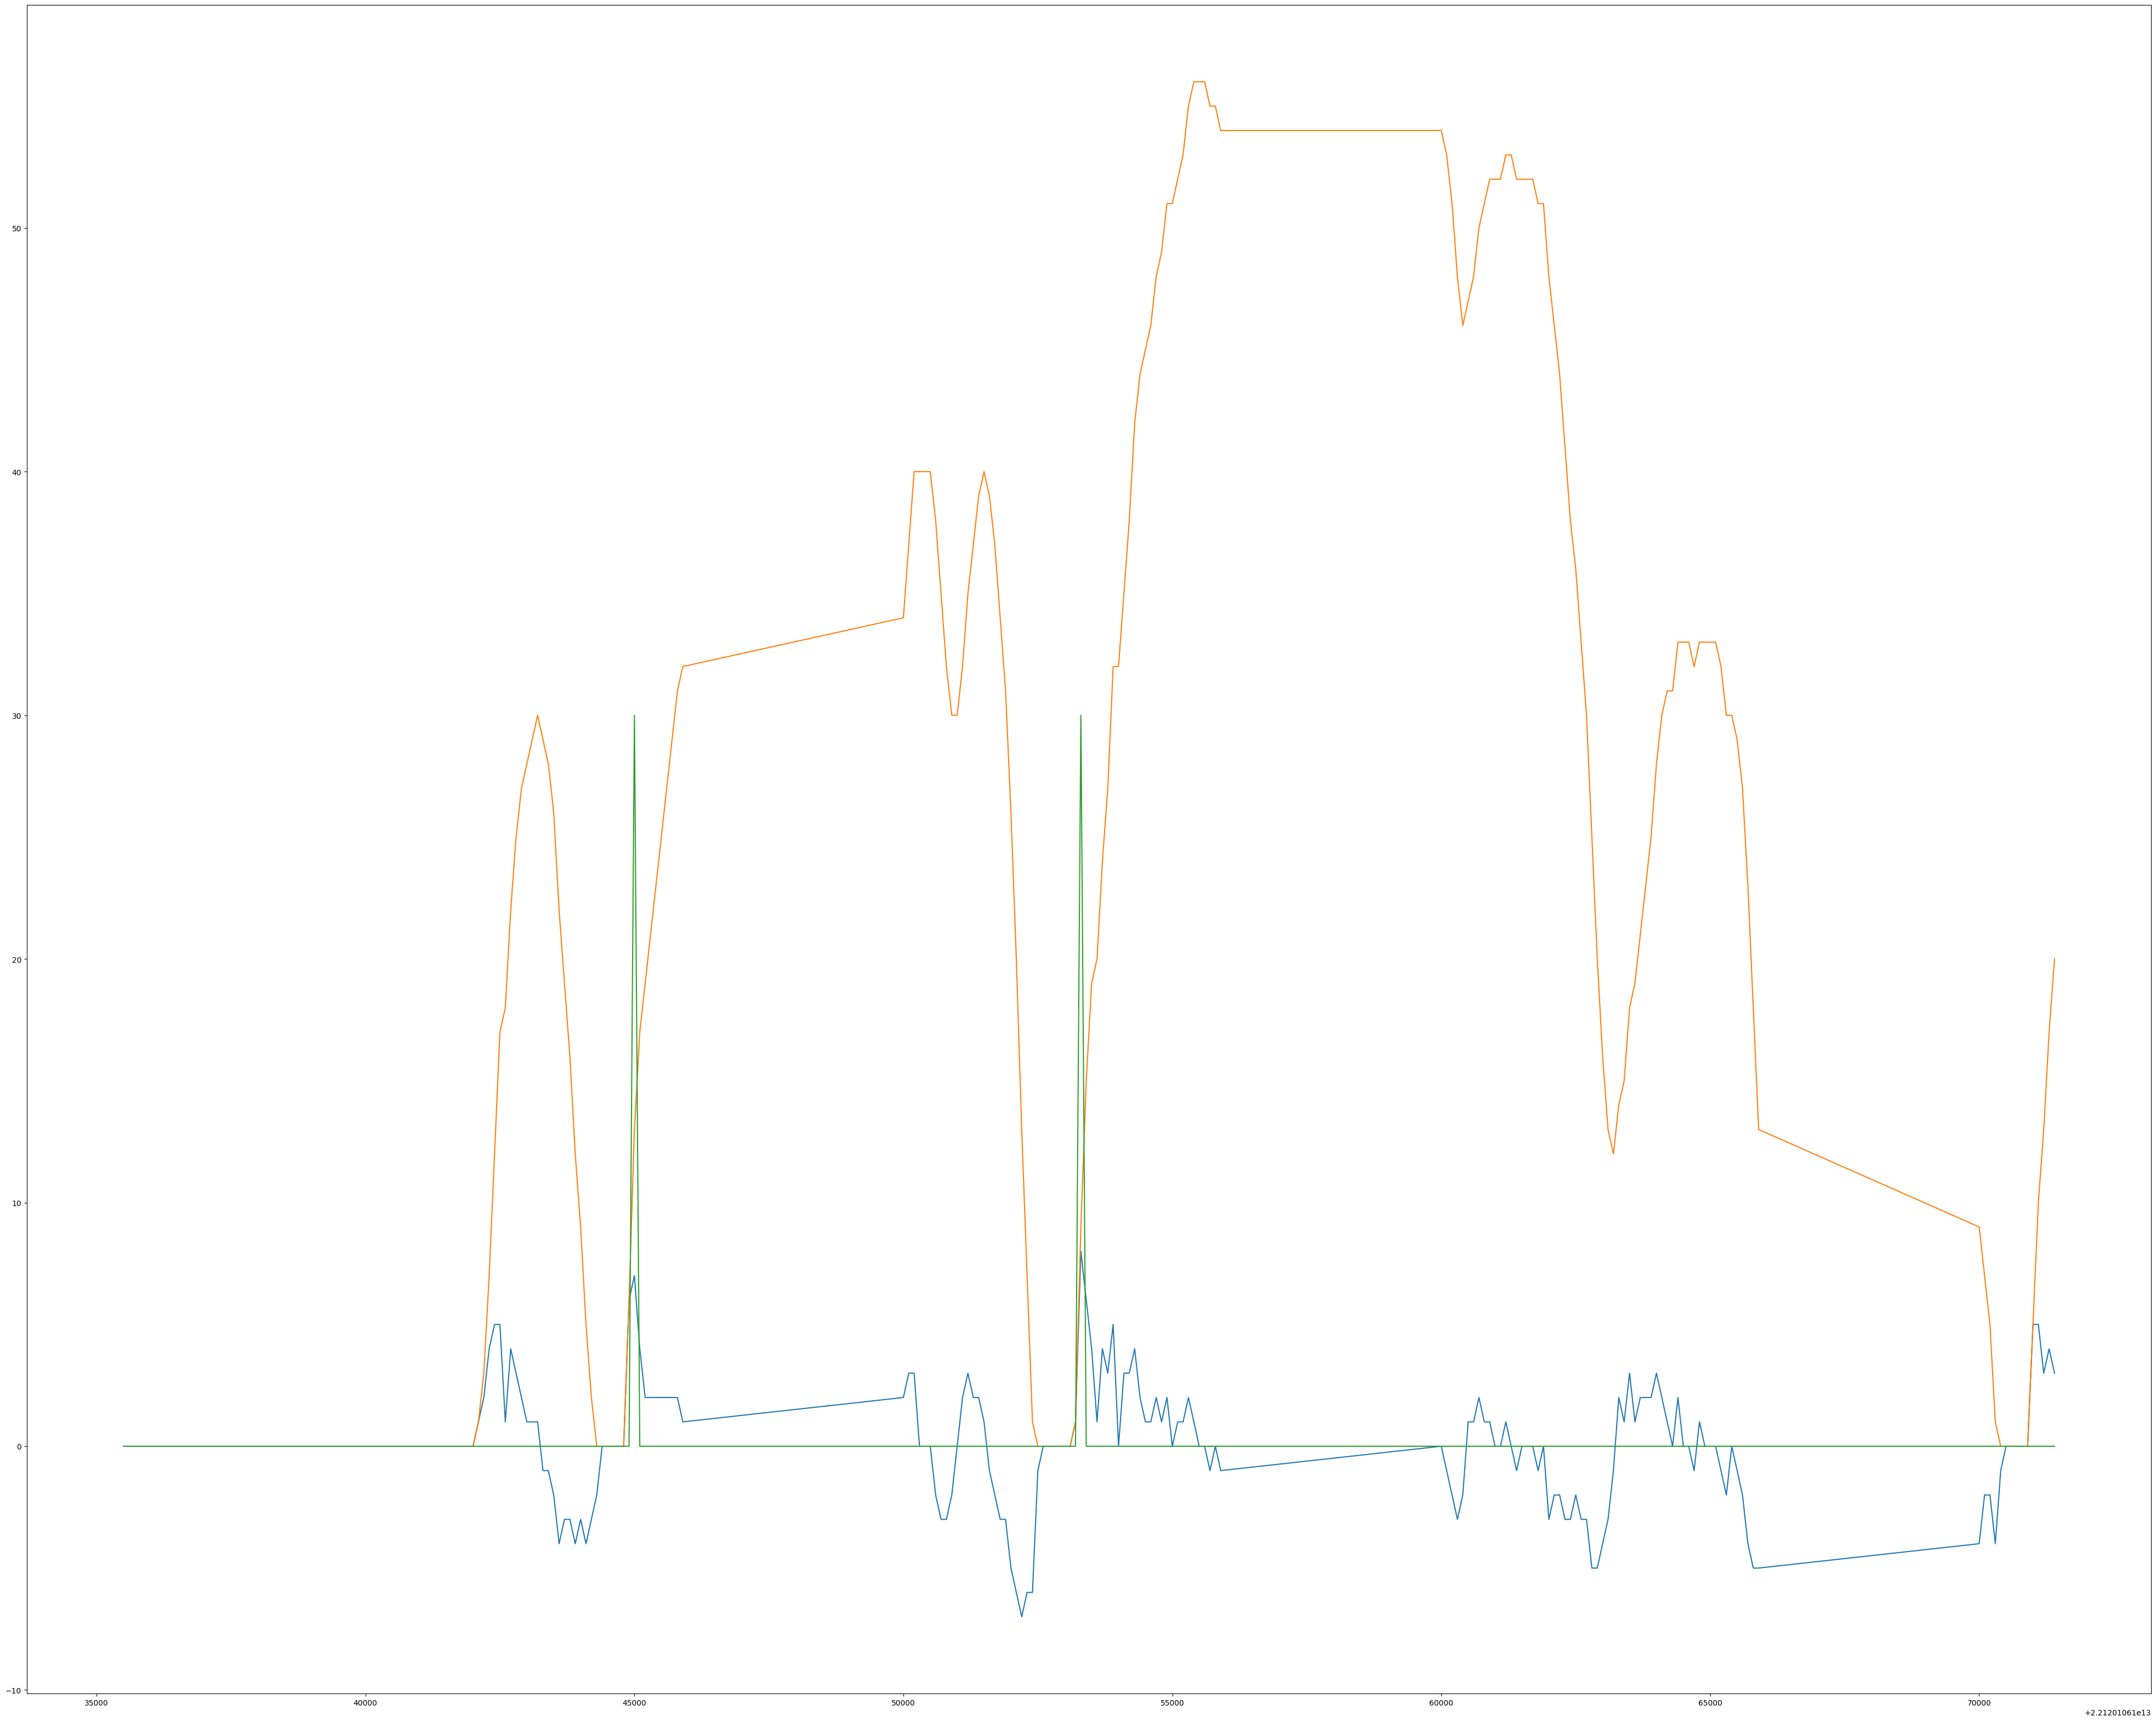

In [89]:
figure = plt.figure(1, figsize = (50, 40))
plt.plot(bus1854_1['정보발생일시'], bus1854_1['가속도'])
plt.plot(bus1854_1['정보발생일시'], bus1854_1['차량속도'])


plt.plot(bus1854_1['정보발생일시'], bus1854_1['급가속'])
# plt.plot(bus1854_1['정보발생일시'], bus1854_1['급감속'])
# plt.plot(bus1854_1['정보발생일시'], bus1854_1['급출발'])
# plt.plot(bus1854_1['정보발생일시'], bus1854_1['급정지'])
plt.show()


In [90]:
bus1893.query('급가속 == 1')

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,급가속,급출발,급감속,급정지,가속도,속도에대한가속도변화량
2875205,20221201,부산70자1893,0,2022752,22120104571400,29,969,1,129.156950,35.234946,219,11.0,13.2,1,1,0,0,25,0.862069
2875224,20221201,부산70자1893,0,2022752,22120104573300,10,1206,1,129.156529,35.234582,223,-12.0,6.8,1,1,0,0,10,1.000000
2875234,20221201,부산70자1893,0,2022752,22120104574300,29,653,0,129.156158,35.234238,218,-8.6,-13.2,1,0,0,0,10,0.344828
2875262,20221201,부산70자1893,0,2022752,22120104581200,12,1226,1,129.154647,35.233211,222,7.1,13.2,1,1,0,0,11,0.916667
2875333,20221201,부산70자1893,0,2022752,22120104592300,12,1693,1,129.153620,35.232546,224,-6.2,4.6,1,1,0,0,12,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358864,20221231,부산70자1893,219,2022971,22123123385300,24,809,1,129.146772,35.225522,105,4.4,0.1,1,1,0,0,24,1.000000
4358894,20221231,부산70자1893,219,2022971,22123123392300,16,1312,1,129.147840,35.225293,110,-12.0,0.1,1,1,0,0,16,1.000000
4358907,20221231,부산70자1893,219,2022971,22123123393600,22,1416,0,129.148229,35.225356,11,-10.9,0.1,1,0,0,0,6,0.272727
4358949,20221231,부산70자1893,219,2022971,22123123401800,29,981,0,129.148520,35.227968,5,7.1,-1.3,1,0,0,0,7,0.241379


In [99]:
bus1893_1 = bus1893.query('2875200<= index <= 2875300')
bus1893_1

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,급가속,급출발,급감속,급정지,가속도,속도에대한가속도변화량
2875200,20221201,부산70자1893,0,2022752,22120104570900,4,977,1,129.157244,35.235205,226,-11.3,-17.6,0,0,0,0,0,0.0
2875201,20221201,부산70자1893,0,2022752,22120104571000,4,985,1,129.157183,35.235157,224,-11.3,-17.6,0,0,0,0,0,0.0
2875202,20221201,부산70자1893,0,2022752,22120104571100,4,979,1,129.157122,35.235110,224,-11.3,-17.6,0,0,0,0,0,0.0
2875203,20221201,부산70자1893,0,2022752,22120104571200,4,985,1,129.157122,35.235110,224,-11.3,-17.6,0,0,0,0,0,0.0
2875204,20221201,부산70자1893,0,2022752,22120104571300,4,977,1,129.157061,35.235051,220,-11.3,-17.6,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875296,20221201,부산70자1893,0,2022752,22120104584600,0,550,1,129.153709,35.232575,216,-6.2,0.1,0,0,0,0,0,0.0
2875297,20221201,부산70자1893,0,2022752,22120104584700,0,547,1,129.153709,35.232575,216,-6.2,0.1,0,0,0,0,0,0.0
2875298,20221201,부산70자1893,0,2022752,22120104584800,0,552,1,129.153709,35.232575,216,-6.2,0.1,0,0,0,0,0,0.0
2875299,20221201,부산70자1893,0,2022752,22120104584900,0,551,1,129.153709,35.232575,216,-6.2,0.1,0,0,0,0,0,0.0


In [100]:
bus1893_1['급가속'] = bus1893_1['급가속'].apply(lambda x: x * 30)
bus1893_1['급감속'] = bus1893_1['급감속'].apply(lambda x: x * 30)
bus1893_1['급출발'] = bus1893_1['급출발'].apply(lambda x: x * 30)
bus1893_1['급정지'] = bus1893_1['급정지'].apply(lambda x: x * 30)
bus1893_1

C:\Users\admin\AppData\Local\Temp\ipykernel_13828\2480498958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus1893_1['급가속'] = bus1893_1['급가속'].apply(lambda x: x * 30)
C:\Users\admin\AppData\Local\Temp\ipykernel_13828\2480498958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus1893_1['급감속'] = bus1893_1['급감속'].apply(lambda x: x * 30)
C:\Users\admin\AppData\Local\Temp\ipykernel_13828\2480498958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,급가속,급출발,급감속,급정지,가속도,속도에대한가속도변화량
2875200,20221201,부산70자1893,0,2022752,22120104570900,4,977,1,129.157244,35.235205,226,-11.3,-17.6,0,0,0,0,0,0.0
2875201,20221201,부산70자1893,0,2022752,22120104571000,4,985,1,129.157183,35.235157,224,-11.3,-17.6,0,0,0,0,0,0.0
2875202,20221201,부산70자1893,0,2022752,22120104571100,4,979,1,129.157122,35.235110,224,-11.3,-17.6,0,0,0,0,0,0.0
2875203,20221201,부산70자1893,0,2022752,22120104571200,4,985,1,129.157122,35.235110,224,-11.3,-17.6,0,0,0,0,0,0.0
2875204,20221201,부산70자1893,0,2022752,22120104571300,4,977,1,129.157061,35.235051,220,-11.3,-17.6,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875296,20221201,부산70자1893,0,2022752,22120104584600,0,550,1,129.153709,35.232575,216,-6.2,0.1,0,0,0,0,0,0.0
2875297,20221201,부산70자1893,0,2022752,22120104584700,0,547,1,129.153709,35.232575,216,-6.2,0.1,0,0,0,0,0,0.0
2875298,20221201,부산70자1893,0,2022752,22120104584800,0,552,1,129.153709,35.232575,216,-6.2,0.1,0,0,0,0,0,0.0
2875299,20221201,부산70자1893,0,2022752,22120104584900,0,551,1,129.153709,35.232575,216,-6.2,0.1,0,0,0,0,0,0.0


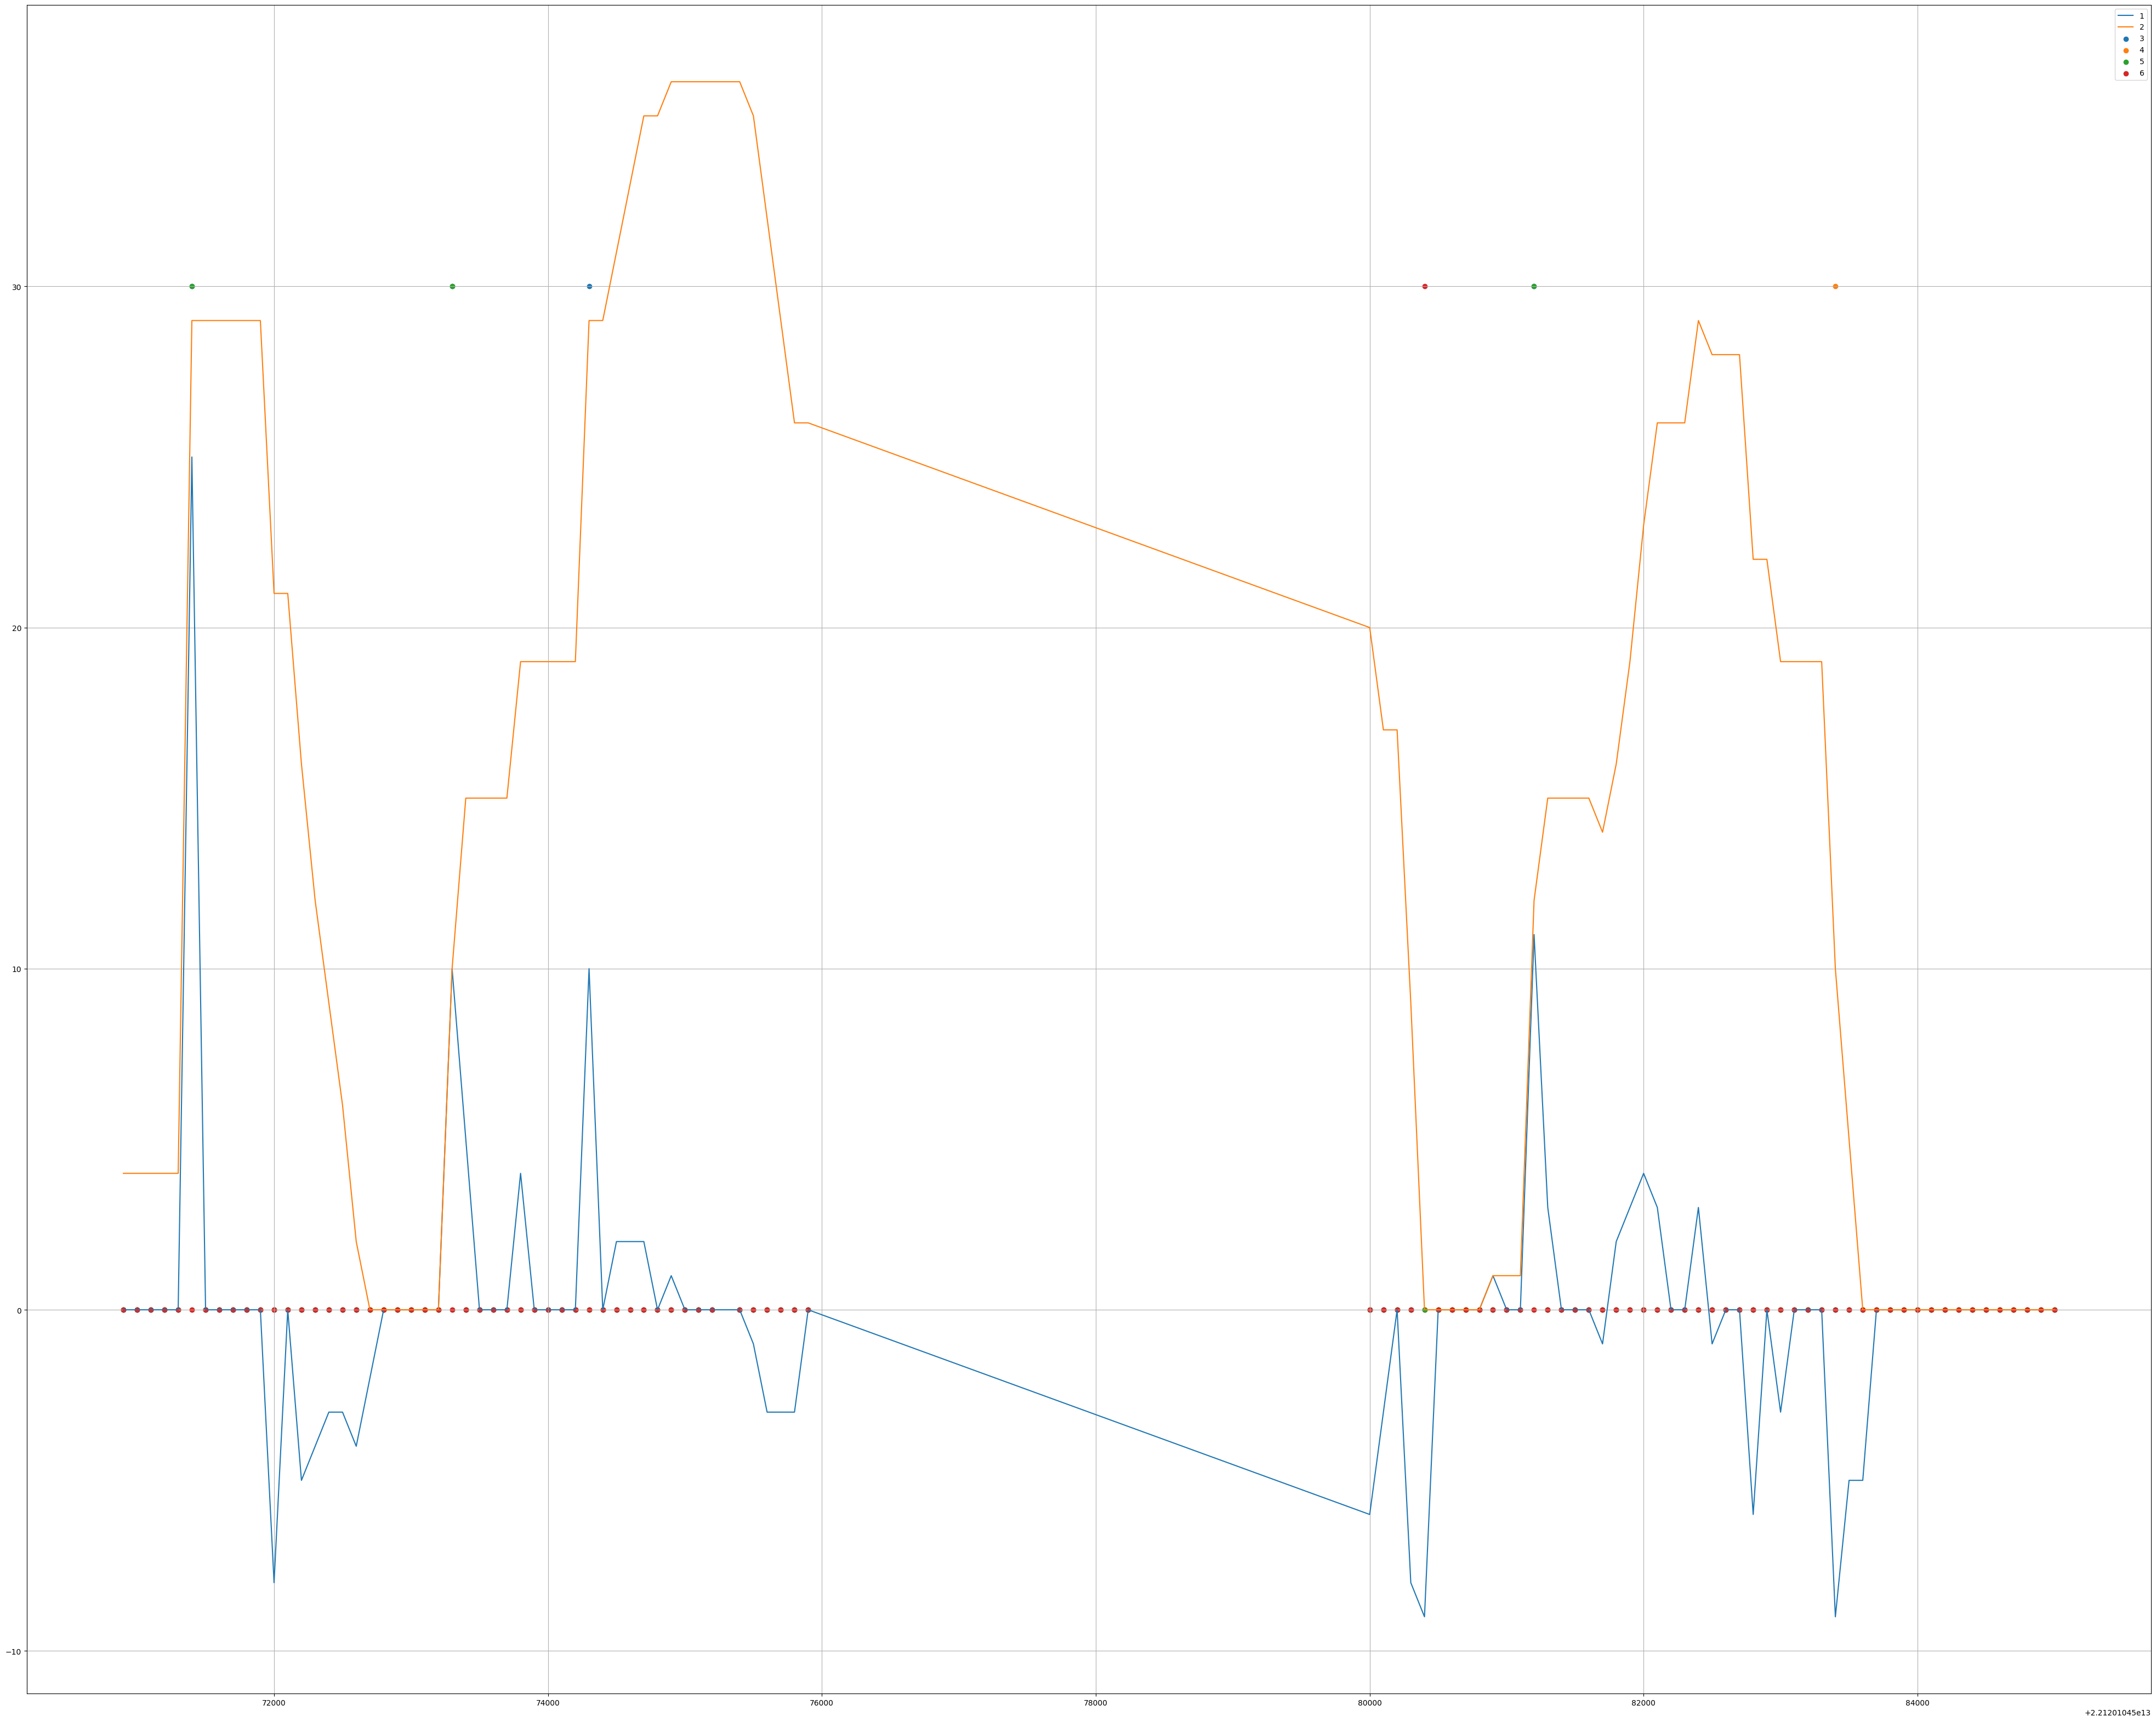

In [105]:
figure = plt.figure(1, figsize = (50, 40))
plt.plot(bus1893_1['정보발생일시'], bus1893_1['가속도'], label='1')
plt.plot(bus1893_1['정보발생일시'], bus1893_1['차량속도'], label='2')
plt.scatter(bus1893_1['정보발생일시'], bus1893_1['급가속'], label='3')
plt.scatter(bus1893_1['정보발생일시'], bus1893_1['급감속'], label='4')
plt.scatter(bus1893_1['정보발생일시'], bus1893_1['급출발'], label='5')
plt.scatter(bus1893_1['정보발생일시'], bus1893_1['급정지'], label='6')
plt.legend()
plt.grid(True)
plt.show()